In [14]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Replace with your actual values
prediction_key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [5]:
image_path = "./test.jpg"  # Local image file

In [6]:
# Construct API URL
url = f"{endpoint}/customvision/v3.0/Prediction/{project_id}/classify/iterations/{published_name}/image"

# Headers
headers = {
    "Prediction-Key": prediction_key,
    "Content-Type": "application/octet-stream"
}

# Read the image as binary
with open(image_path, "rb") as image_file:
    response = requests.post(url, headers=headers, data=image_file)

# Print response
if response.status_code == 200:
    print("Prediction Result:", response.json())
else:
    print("Error:", response.text)

Prediction Result: {'id': '6472b812-7d50-4b47-9078-76c1c5171d26', 'project': '1ce47d63-7d18-448a-9d60-aa64394c7928', 'iteration': 'cdf26d0f-f87a-4bc5-b372-fb9f139ba1a0', 'created': '2025-03-26T08:20:48.584Z', 'predictions': [{'probability': 0.9999392, 'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9', 'tagName': 'burner', 'boundingBox': {'left': 0.49849853, 'top': 0.49855158, 'width': 0.24700573, 'height': 0.26883277}}, {'probability': 0.9999316, 'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9', 'tagName': 'burner', 'boundingBox': {'left': 0.42446393, 'top': 0.2403806, 'width': 0.26268917, 'height': 0.22873108}}, {'probability': 0.9998404, 'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9', 'tagName': 'burner', 'boundingBox': {'left': 0.13277338, 'top': 0.4642217, 'width': 0.3032335, 'height': 0.31014892}}, {'probability': 0.99969053, 'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9', 'tagName': 'burner', 'boundingBox': {'left': 0.21407354, 'top': 0.243421, 'width': 0.19092724, 'height': 0.162

In [7]:
response.json()

{'id': '6472b812-7d50-4b47-9078-76c1c5171d26',
 'project': '1ce47d63-7d18-448a-9d60-aa64394c7928',
 'iteration': 'cdf26d0f-f87a-4bc5-b372-fb9f139ba1a0',
 'created': '2025-03-26T08:20:48.584Z',
 'predictions': [{'probability': 0.9999392,
   'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9',
   'tagName': 'burner',
   'boundingBox': {'left': 0.49849853,
    'top': 0.49855158,
    'width': 0.24700573,
    'height': 0.26883277}},
  {'probability': 0.9999316,
   'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9',
   'tagName': 'burner',
   'boundingBox': {'left': 0.42446393,
    'top': 0.2403806,
    'width': 0.26268917,
    'height': 0.22873108}},
  {'probability': 0.9998404,
   'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9',
   'tagName': 'burner',
   'boundingBox': {'left': 0.13277338,
    'top': 0.4642217,
    'width': 0.3032335,
    'height': 0.31014892}},
  {'probability': 0.99969053,
   'tagId': 'd2cbd074-7074-475f-959e-0af3b14a4ad9',
   'tagName': 'burner',
   'boundingBox': {'left': 0.

In [16]:
predictions = response.json()["predictions"]

# Probability threshold (adjust as needed)
PROBABILITY_THRESHOLD = 0.93  # Only show objects with > 50% confidence

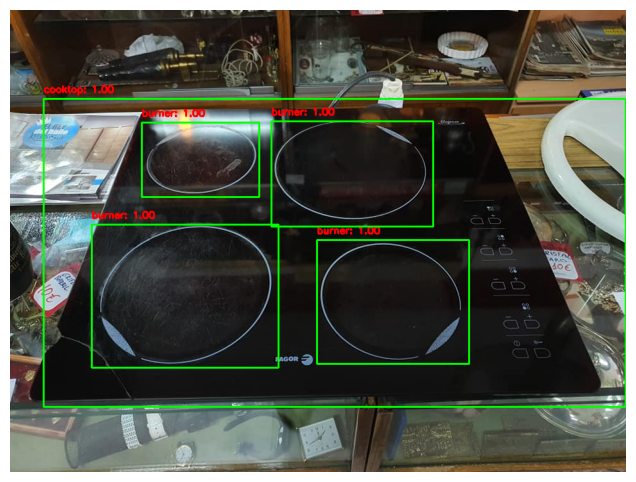

In [17]:
# Load the original image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Get image dimensions
height, width, _ = image.shape

# Draw bounding boxes for predictions above threshold
for pred in predictions:
    probability = pred["probability"]
    
    if probability >= PROBABILITY_THRESHOLD:  # Filter low-confidence detections
        tag_name = pred["tagName"]
        bbox = pred["boundingBox"]

        # Convert bounding box values to pixel coordinates
        left = int(bbox["left"] * width)
        top = int(bbox["top"] * height)
        box_width = int(bbox["width"] * width)
        box_height = int(bbox["height"] * height)

        # Draw the rectangle
        cv2.rectangle(image, (left, top), (left + box_width, top + box_height), (0, 255, 0), 2)

        # Label with tag name and probability
        label = f"{tag_name}: {probability:.2f}"
        cv2.putText(image, label, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the image with Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis("off")
plt.show()